<a href="https://colab.research.google.com/github/DarioDell/Univariate_time_series/blob/main/NYC_Taxi_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚕 **New York taxi traffic Analysis** 🚕

The dataset below provides information obout the Number of New York taxi passengers. The raw data is from the NYC Taxi and Limousine Commission. The data file included here consists of aggregating the total number of taxi passengers into 30 minute buckets.<br>
I'm going to use this data for make a relevant study and anomaly detection.<br>
More precisely, I am going to decompose the dataset, observing the daily behavior of the city.
I obtained the dataset from Kaggle: https://www.kaggle.com/datasets/julienjta/nyc-taxi-traffic

## Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Load the dataset

In [ ]:
df = pd.read_csv('./dataset.csv', index_col='timestamp', parse_dates=True)
df

,Unnamed: 0,value
timestamp,,
2014-07-01 00:00:00,0,10844
2014-07-01 00:30:00,1,8127
2014-07-01 01:00:00,2,6210
2014-07-01 01:30:00,3,4656
2014-07-01 02:00:00,4,3820
...,...,...
2015-01-31 21:30:00,10315,24670
2015-01-31 22:00:00,10316,25721
2015-01-31 22:30:00,10317,27309


## Data preprocessing and transformation

In [ ]:
df.isnull().sum()

Unnamed: 0    0
value         0
dtype: int64

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

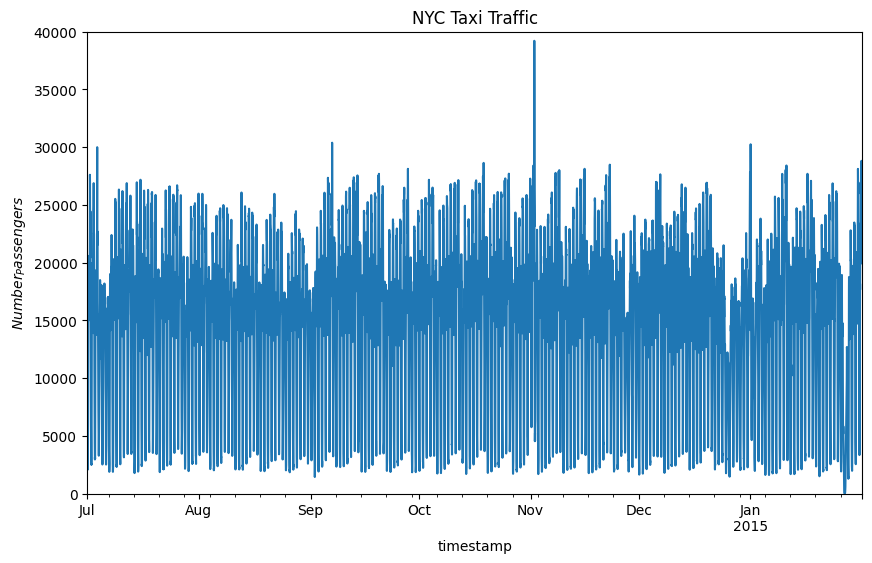

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df.plot(ax=ax, color='C0', legend=None)

ax.set_ylim(0, 40000)
ax.set_ylabel('$Number_Passengers$')
ax.set_title('NYC Taxi Traffic');

A certain periodicity is observed, a constant pattern is repeated.<br>
Seasonality is observed, although it is not a useful graph to detect daily patterns.

## Visualizing study patterns

### Separate the day and time

In [ ]:
df['date'] = df.index.normalize()
df['time'] = df.index.time.astype(str)
df

,value,date,time
timestamp,,,
2014-07-01 00:00:00,10844,2014-07-01,00:00:00
2014-07-01 00:30:00,8127,2014-07-01,00:30:00
2014-07-01 01:00:00,6210,2014-07-01,01:00:00
2014-07-01 01:30:00,4656,2014-07-01,01:30:00
2014-07-01 02:00:00,3820,2014-07-01,02:00:00
...,...,...,...
2015-01-31 21:30:00,24670,2015-01-31,21:30:00
2015-01-31 22:00:00,25721,2015-01-31,22:00:00
2015-01-31 22:30:00,27309,2015-01-31,22:30:00


### Dataset transformation

**I set the "time" on the X axis and the "date" on the Y axis**<br>
Where each row represents one different day

In [ ]:
df_new = df.pivot(index='date', columns='time', values='value')
df_new

time,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
date,,,,,,,,,,,,,,,,,,,,,
2014-07-01,10844,8127,6210,4656,3820,2873,2369,2064,2221,2158,...,26827,24904,22875,20394,23401,24439,23318,21733,20104,16111
2014-07-02,13370,9945,7571,5917,4820,3634,2993,2535,2570,2485,...,24887,26872,22009,18259,20844,22576,22401,19056,17518,15307
2014-07-03,12646,10562,8416,7098,5826,4383,3270,2948,3146,3077,...,29985,21501,22684,22188,22663,19573,17136,16606,16166,16020
2014-07-04,15591,14395,12535,11341,9980,8404,7200,6578,5657,4474,...,14999,14487,14415,13796,14036,14021,15593,16589,17984,18035
2014-07-05,17576,16189,14441,12535,11006,9151,8010,7096,6407,4421,...,18182,16861,14140,14477,15293,15457,16048,17477,16391,17006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-27,109,80,40,39,26,32,8,11,9,20,...,11967,10813,10419,10132,10566,11073,10559,9121,8700,6884
2015-01-28,5502,4001,3039,2431,2005,1661,1300,1279,1407,1353,...,22786,22169,21155,20120,20428,20309,20059,19055,15481,12535
2015-01-29,10134,7568,5619,4342,3604,2822,2379,2121,2130,1968,...,23464,23343,23197,23120,23208,23188,22638,21501,20719,17877


### Plot

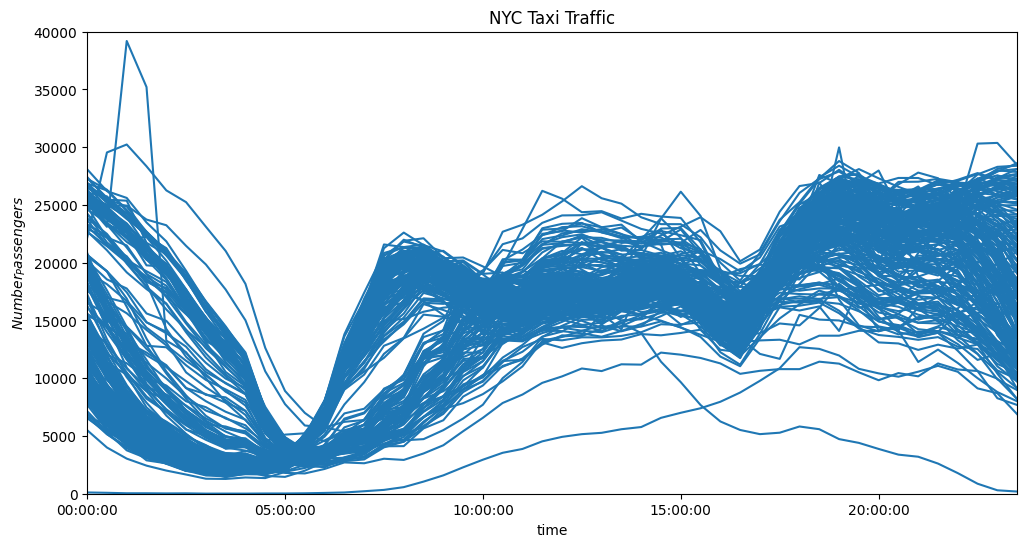

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_new.T.plot(ax=ax, color='C0', legend=False)
ax.set_xlim([0, 47])
ax.set_ylim(0,40000)
ax.set_ylabel('$Number_Passengers$')
ax.set_title('NYC Taxi Traffic');

# Each line represents a day

It is not possible to interpret the graph in this way, so below I give it a custom transparency value for a better observation.

### Plot with transparency: alpha

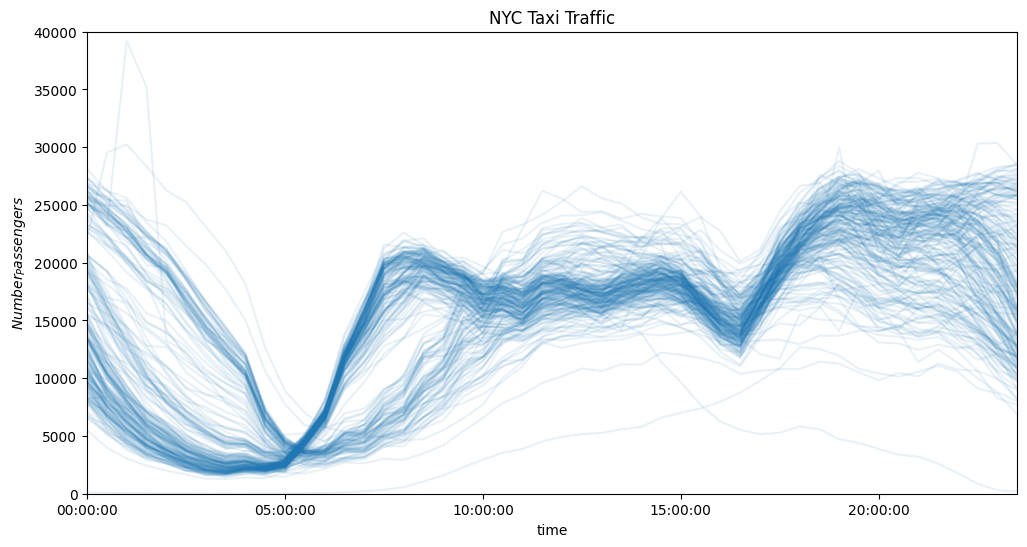

In [ ]:
#alpha: transparency level
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_new.T.plot(ax=ax, color='C0', alpha=0.1, legend=False)
ax.set_xlim([0, 47])
ax.set_ylim(0,40000)
ax.set_ylabel('$Number_Passengers$')
ax.set_title('NYC Taxi Traffic');

Where it is darker it's because there is a greater concentration of days.<br>
Different groups of lines can be identified, groups of lines that have different behaviors

## Visualizing daily patterns


According to recent estimates, the population of New York City exceeds 8 million.<br>
Business hours in New York may vary depending on the type of business and specific location. However, in general, many shops and businesses in commercial areas tend to open around 10:00 a.m. and they close around 7:00 p.m., especially on weekdays. Hours may be different on weekends, with some stores opening a little later or closing a little earlier. Next we will see how this affects public transport consumption



### Business days

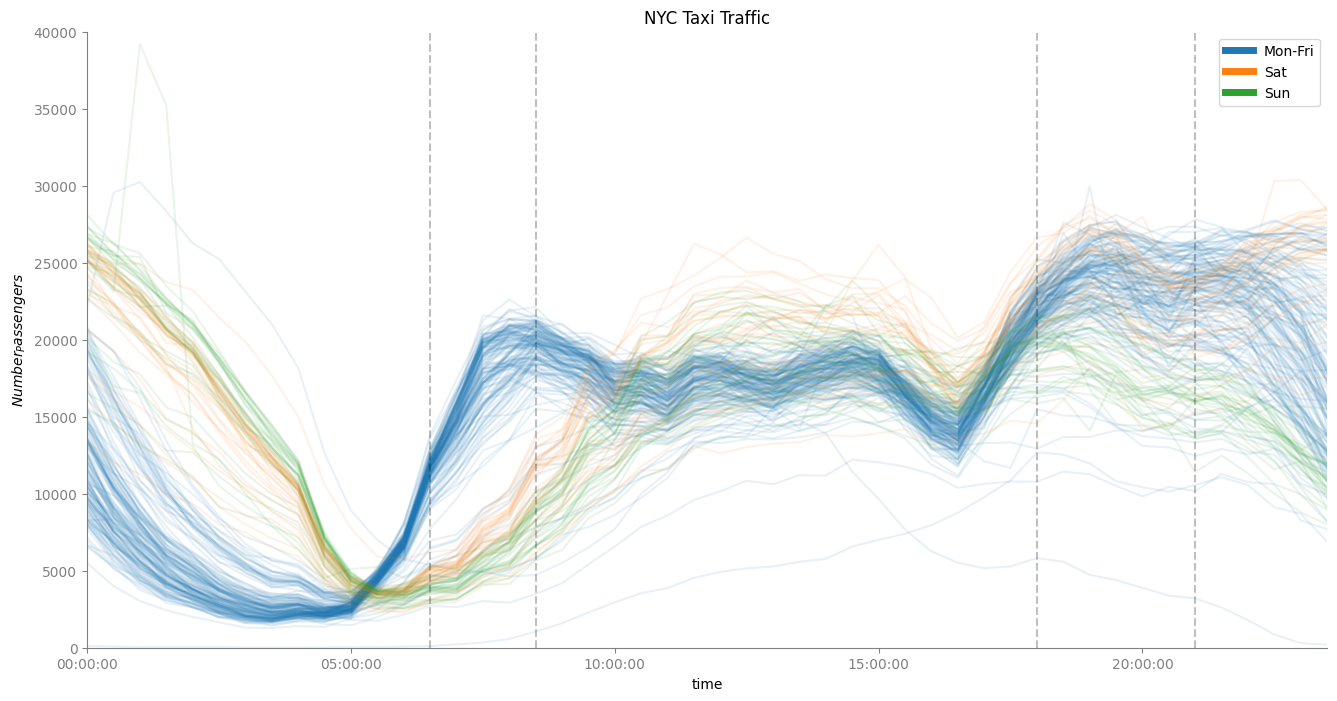

In [ ]:
#T he days from Monday to Friday (busy days) will appear blue, because they have similar behavior.
# Saturdays and Sundays another color.
# So we would have 3 groups of days

day_colors = { 'Monday': 'C0',
               'Tuesday': 'C0',
               'Wednesday': 'C0',
               'Thursday': 'C0',
               'Friday': 'C0',
               'Saturday': 'C1',
               'Sunday': 'C2'}

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for day_name, color in day_colors.items():
    # i'm plotting the transposed DataFrame
    df_new[df_new.index.day_name() == day_name].T.plot(
        ax=ax, color=color, alpha=0.1, legend=None)

ax.set_xlim([0, 47])
ax.set_ylim(0,40000)

#vertical lines defining a certain schedule
ax.axvline(13, alpha=0.25, color='black', linestyle='--')
ax.axvline(17, alpha=0.25, color='black', linestyle='--')
ax.axvline(36, alpha=0.25, color='black', linestyle='--')
ax.axvline(42, alpha=0.25, color='black', linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')

plt.gca().tick_params(colors= '0.5', grid_color='grey')

ax.set_ylabel('$Number_Passengers$')
ax.set_title('NYC Taxi Traffic');

# Leyenda:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=5),
                #Line2D([0], [0], color='C1', lw=2),
                Line2D([0], [0], color='C1', lw=5),
                Line2D([0], [0], color='C2', lw=5)]

ax.legend(custom_lines, ['Mon-Fri','Sat', 'Sun']);


### <u>Conclusion</u>

It seems that the traffic follows a weekly frequency in New York.

The graph shows how the greatest demand for taxis occurs:


*   when people go to work (between 7 am and 9 am)
*   when people leave work (between 6 pm and 9 pm)



### Night life


In [ ]:
# I change the X axis to start from 8 pm
# 20 hours are 40 half hours
df_wk = pd.DataFrame(index=df_new.index,
                       columns=np.roll(df_new.columns, -40),
                       data=np.roll(df_new.values, -40))

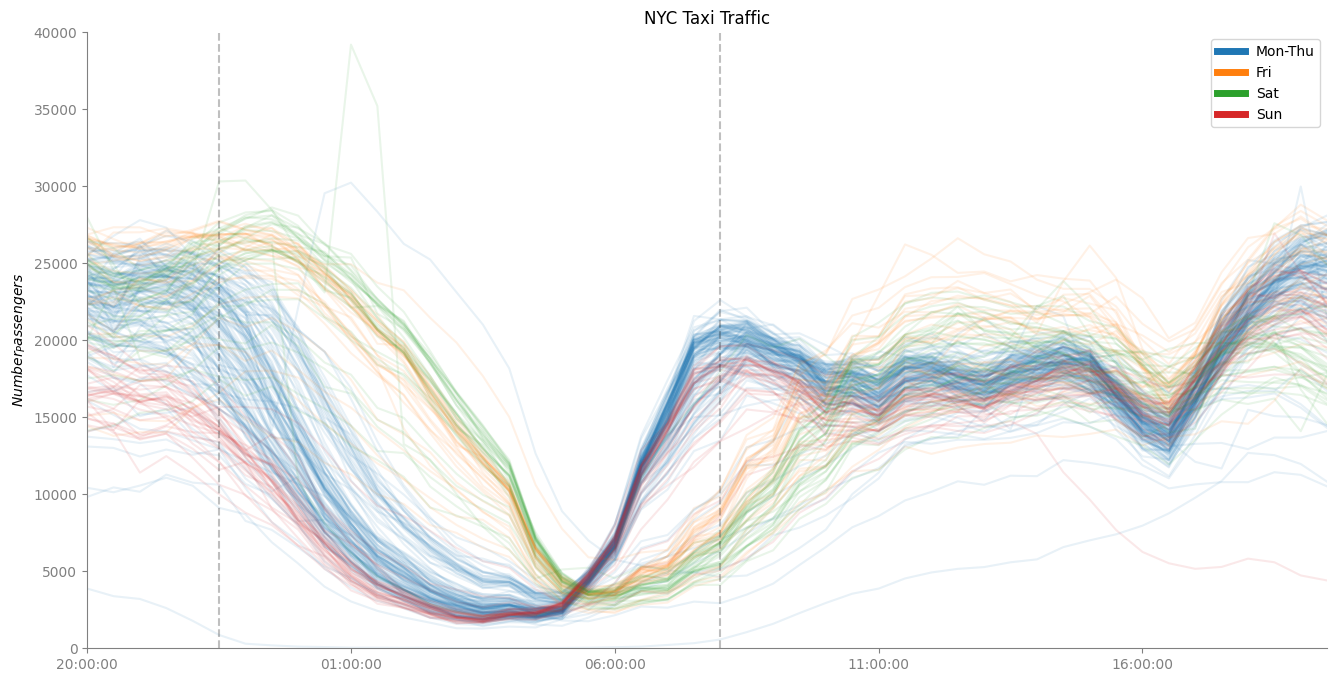

In [ ]:
# Here we have have 4 groups of days.
# I have separated Friday from the rest of the days of the week, because we will consider Friday afternoon as the weekend.

day_colors = { 'Monday': 'C0',
               'Tuesday': 'C0',
               'Wednesday': 'C0',
               'Thursday': 'C0',
               'Friday': 'C1',
               'Saturday': 'C2',
               'Sunday': 'C3'}

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for day_name, color in day_colors.items():
    # NOTE: we are plotting the transposed DataFrame
    df_wk[df_wk.index.day_name() == day_name].T.plot(
        ax=ax, color=color, alpha=0.1, legend=None)

ax.set_xlim([0, 47])
ax.set_ylim(0,40000)

#Líneas verticales definiendo los horarios de calefacción
ax.axvline(5, alpha=0.25, color='black', linestyle='--')
ax.axvline(24, alpha=0.25, color='black', linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')

plt.gca().tick_params(colors= '0.5', grid_color='grey')

ax.set_ylabel('$Number_Passengers$')
ax.set_title('NYC Taxi Traffic');

# Leyenda:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=5),
                Line2D([0], [0], color='C1', lw=5),
                Line2D([0], [0], color='C2', lw=5),
                Line2D([0], [0], color='C3', lw=5)]

ax.legend(custom_lines, ['Mon-Thu', 'Fri', 'Sat', 'Sun']);

### <u>Conclusion</u>

The idea of ​​this graph is to show how taxi consumption fluctuates throughout the weekend.<br>
the greatest demand for taxis occurs:


*   Friday and saturdays at night (People usually hangout with friends,partner, family)
*   Sunday earlier morning (When they return home)



It can be concluded that a normal weekly flow of taxi consumption is observed, as is probably the case in any large city.
Although they are also detected certain **anomalies** or **inconsistencies**.<br>
In both graphs there are peaks that exceed 30,000 passengers and one that remains at 0 for hours. These extraordinary cases may be due to: an important marathon, Thanksgiving, Christmas, New Years day, a snow storm, etc.<br>
From this data it is possible to obtain precise and real information about public transport. Using it for analysis and carry out an in-depth study can be  useful and obtain any relevant information.
It can also be used to predict anomalies in real time and provide information about the nature of anomalies to react well when they occur.